In [50]:
import numpy as np
import cv2 as cv  
import pandas as pd
import matplotlib.pyplot as plt


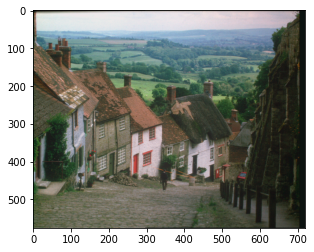

In [51]:
img = plt.imread('./images/goldhill.bmp')
plt.imshow(img)
plt.show()

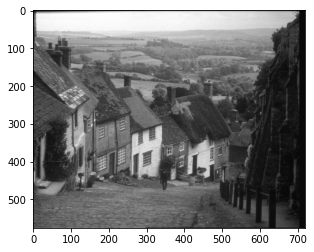

In [52]:
grayimage =cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plt.imshow(grayimage, cmap ='gray')

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x1e8c9a3df90>)

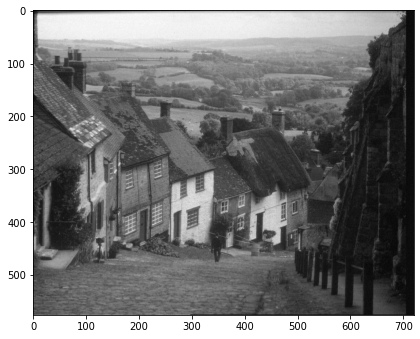

In [53]:
def noise(imgg, mu, sigma):
    h, l = imgg.shape
    gaussian = np.random.normal(mu, sigma, imgg.shape)*255
    noise = imgg+gaussian
    for i in range(0, h):
        for j in range(0, l):
            if noise[i, j] < 0:
                noise[i, j] = 0
            elif noise[i, j] > 255:
                noise[i, j] = 255
            else:
                noise[i, j] = noise[i, j]
    noise = np.uint8(noise)
    return noise
noised_image = noise(grayimage, 0, 0.01)
plt.figure(figsize=(15,15))
plt.subplot(121),plt.imshow(noised_image,cmap='gray')


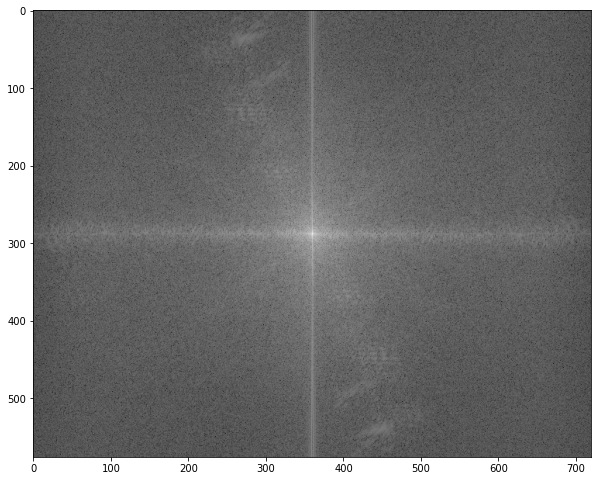

In [54]:
f = np.fft.fft2(noised_image)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))
plt.figure(figsize=(10,10))
plt.imshow(magnitude_spectrum,cmap='gray')
plt.show()

(<AxesSubplot:title={'center':'passe bande'}>,
 Text(0.5, 1.0, 'passe bande'))

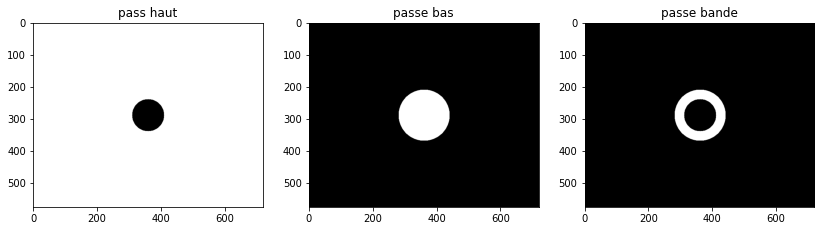

In [93]:
nl,nc=noised_image.shape
D0=50
D1=80 #D0 fréquence de coupure du filtre
x = np.arange(-nl/2,nl/2,1)
y = np.arange(-nc/2,nc/2,1)
xx, yy = np.meshgrid(y, x, sparse=True)
z = np.sqrt(xx*xx+yy*yy)
H=z>D0
K=z<D1
L = np.uint8(H)
W = np.uint8(K)
C = cv.bitwise_and(L,W)
plt.figure(figsize=(14,14))
plt.subplot(131),plt.imshow(H,cmap='gray'),plt.title("pass haut")
plt.subplot(132),plt.imshow(K,cmap='gray'),plt.title("passe bas")
plt.subplot(133),plt.imshow(C,cmap='gray'),plt.title("passe bande")



(<AxesSubplot:title={'center':'specter of passe bande'}>,
 Text(0.5, 1.0, 'specter of passe bande'))

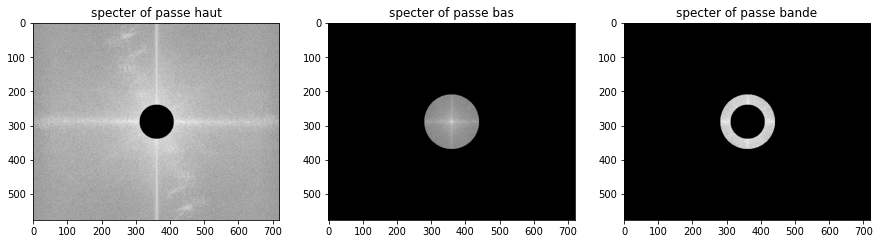

In [94]:
image = magnitude_spectrum*H
image2 = magnitude_spectrum*K
image3 = magnitude_spectrum*C
plt.figure(figsize=(15,15))
plt.subplot(131),plt.imshow(image,cmap='gray'),plt.title("specter of passe haut")
plt.subplot(132),plt.imshow(image2,cmap='gray'),plt.title("specter of passe bas")
plt.subplot(133),plt.imshow(image3,cmap='gray'),plt.title("specter of passe bande")

(<AxesSubplot:title={'center':'passe bande'}>,
 Text(0.5, 1.0, 'passe bande'))

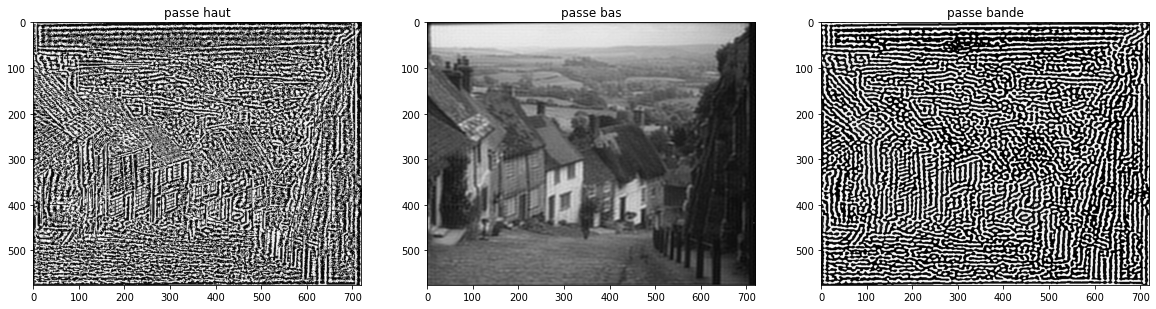

In [95]:
xxx = H*fshift
yyy = K*fshift
zzz = C*fshift
f_ishift = np.fft.ifftshift(xxx)
f_ishifty = np.fft.ifftshift(yyy)
f_ishiftz = np.fft.ifftshift(zzz)
img_back = np.fft.ifft2(f_ishift)
img_back2 = np.fft.ifft2(f_ishifty)
img_back3 = np.fft.ifft2(f_ishiftz)
img_back = np.real(img_back)
img_back2 = np.real(img_back2)
img_back3 = np.real(img_back3)
img_back=np.uint8(img_back)
img_back2=np.uint8(img_back2)
img_back3=np.uint8(img_back3)
plt.figure(figsize=(20,20))
plt.subplot(131),plt.imshow(img_back,cmap='gray'),plt.title("passe haut")
plt.subplot(132),plt.imshow(img_back2,cmap='gray'),plt.title("passe bas")
plt.subplot(133),plt.imshow(img_back3,cmap='gray'),plt.title("passe bande")
